# Tarea 3

Fragoso Alvarado Daniel | 316049054

### Introducción

La serie de Fourier aproxima una señal o función contínua mediante una serie infinita de sinusoides.
$$
f(t)=a_{0}+\sum_{k=1}^{\infty}\left[a_{k} \cos \left(k \omega_{0} t\right)+b_{k} \sin \left(k \omega_{0} t\right)\right]
$$
donde los coeficientes de la ecuación se calculan como:
$$
\begin{aligned}
&a_{k}=\frac{2}{T} \int_{0}^{T} f(t) \cos \left(k \omega_{0} t\right) \delta t \\
&b_{k}=\frac{2}{T} \int_{0}^{T} f(t) \sin \left(k \omega_{0} t\right) \delta t
\end{aligned}
$$
El análisis de Fourier transmite una función como un agregado de componentes periódicos y extrae esas señales de los componentes. Cuando tanto la función como su transformada se intercambian con las partes discretas, entonces se expresa como Transformada de Fourier. La Transformada rápida de Fourier (FFT) trabaja principalmente con algoritmos computacionales para aumentar la velocidad de ejecución. Algoritmos de filtrado, multiplicación, procesamiento de imágenes son algunas de sus aplicaciones.

### Actividad 1

Utilice el módulo `scipy.fft` de Python para la transformación rápida de Fourier de la siguiente función:
$$
f(t)=3 \sin (7,2 \pi t+2)+1
$$
Grafique la función y visualícela de manera que se pueda ver bien toda la función y sus cambios. Puede usar t = `np.linspace(0, T, N)` donde $T=10$ y $N=256$


In [1]:
# Importación de Librerias necesarias:
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
# Definamos tamaño de Gráficas:
import scipy
from scipy.fft import fft, ifft, fft2, ifft2

In [141]:
# Primero vamos a definir la función

def fun(t):
    return(3*np.sin(7.2*np.pi*t+2) + 1)

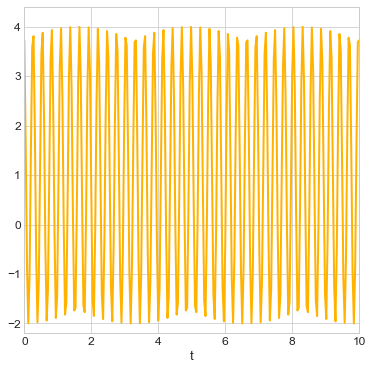

In [146]:
# Grafiquemos:

plt.style.use('seaborn-whitegrid') #classic

plt.figure(figsize=(6,6))

# Sisguiendo la sugerencia de la tarea:
t = np.linspace(0, 10, 256)
f = fun(t)

# Debido a los límites actuales la figura se puede mostrar un poco ajustada, 
# Cambiamos los límites con el fin de ver con claridad todos los puntos.
pl.xlim(t.min() * 1.1, t.max() * 1)
pl.ylim(f.min() * 1.1, f.max() * 1.1)

# Graficar la función coseno con una línea discontinua azul de 2.5 pixeles de grosor
pl.plot(t, f, color="#FFB200", linewidth=2, linestyle="-", label="f(t)")

plt.xlabel("t", fontsize = 13)

ax = pl.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)


pl.show()

/Users/danielfragoso/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
/Users/danielfragoso/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


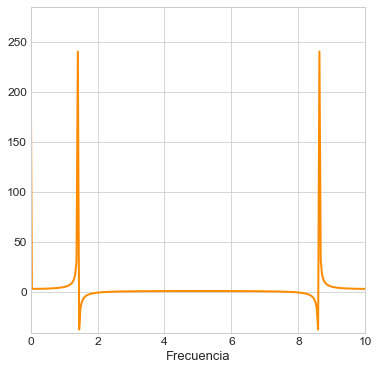

In [147]:
# Ahora realicemos la transformación
# Grafiquemos:

plt.style.use('seaborn-whitegrid') #classic

plt.figure(figsize=(6,6))

f = fft(fun(t))

# Debido a los límites actuales la figura se puede mostrar un poco ajustada, 
# Cambiamos los límites con el fin de ver con claridad todos los puntos.
pl.xlim(t.min() * 1 , t.max() * 1)
pl.ylim(f.min() * 1.1, f.max() * 1.1)

# Graficar la función coseno con una línea discontinua azul de 2.5 pixeles de grosor
pl.plot(t, f, color="#FF8B00", linewidth=2, linestyle="-", label="f(t)")

plt.xlabel("Frecuencia", fontsize = 13)

ax = pl.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)

pl.show()

Para poder generar el calculo de la tranformada de Fourier de cforma correcta, no solo vasta con generar el calcúlo sobre la función debemos de obtener las feecuencias de corte, debido a la forma en que se claucla la tranfomada rápida.

In [143]:
T = 2/(51.6) # Intervalo de Muestreo

fc = 1/(2*T) # Frecuencia de corte
t = np.linspace(-fc, fc, 500)


/Users/danielfragoso/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
/Users/danielfragoso/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


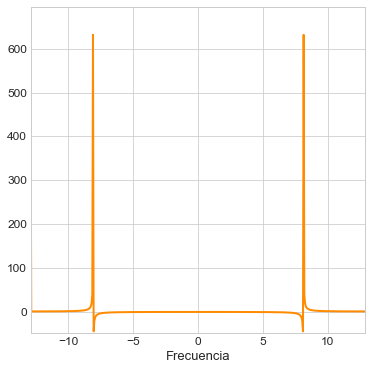

In [126]:
# Ahora realicemos la transformación
# Grafiquemos:

plt.style.use('seaborn-whitegrid') #classic

plt.figure(figsize=(6,6))

f = fft(fun(t))

# Debido a los límites actuales la figura se puede mostrar un poco ajustada, 
# Cambiamos los límites con el fin de ver con claridad todos los puntos.
pl.xlim(t.min() * 1 , t.max() * 1)
pl.ylim(f.min() * 1.1, f.max() * 1.1)

# Graficar la función coseno con una línea discontinua azul de 2.5 pixeles de grosor
pl.plot(t, f, color="#FF8B00", linewidth=2, linestyle="-", label="f(t)")

plt.xlabel("Frecuencia", fontsize = 13)

ax = pl.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)

pl.show()


Sin embargo, esta transformadano es muy representativa de nuestros datos,pues sabemos que es periodica y uniforeme, una mayor densidad en los datos nos puedne eprmmitir ver mejor su comportamiento.

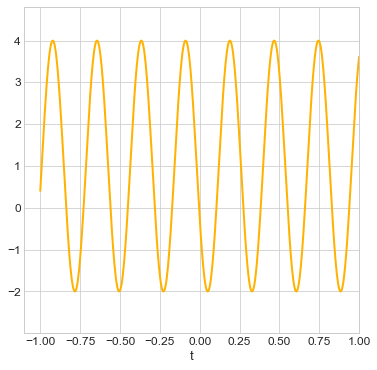

In [127]:
# Grafiquemos:

plt.style.use('seaborn-whitegrid') #classic

plt.figure(figsize=(6,6))

# Sisguiendo la sugerencia de la tarea:
t = np.linspace(-1, 1, 500)
f = fun(t)

# Debido a los límites actuales la figura se puede mostrar un poco ajustada, 
# Cambiamos los límites con el fin de ver con claridad todos los puntos.
pl.xlim(t.min() * 1.1, t.max() * 1)
pl.ylim(f.min() * 1.5, f.max() * 1.2)

# Graficar la función coseno con una línea discontinua azul de 2.5 pixeles de grosor
pl.plot(t, f, color="#FFB200", linewidth=2, linestyle="-", label="f(t)")

plt.xlabel("t", fontsize = 13)

ax = pl.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)


pl.show()

In [144]:
T = 2/(500) # Intervalo de Muestreo
fc = 1/(2*T) # Frecuencia de corte

t = np.linspace(-fc, fc, 526)

/Users/danielfragoso/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
/Users/danielfragoso/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


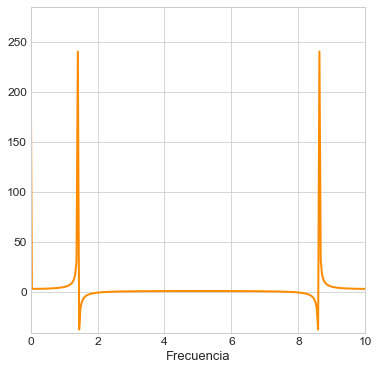

In [148]:
from scipy.fft import rfft, fftfreq, fftshift
# Ahora realicemos la transformación
# Grafiquemos:

plt.style.use('seaborn-whitegrid') #classic

plt.figure(figsize=(6,6))

f = fft(fun(t))

# Debido a los límites actuales la figura se puede mostrar un poco ajustada, 
# Cambiamos los límites con el fin de ver con claridad todos los puntos.
pl.xlim(t.min() * 1 , t.max() * 1)
pl.ylim(f.min() * 1.1, f.max() * 1.1)

# Graficar la función coseno con una línea discontinua azul de 2.5 pixeles de grosor
pl.plot(t, f, color="#FF8B00", linewidth=2, linestyle="-", label="f(t)")

plt.xlabel("Frecuencia", fontsize = 13)

ax = pl.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)

pl.show()

# Ejercicio 2

/var/folders/7n/jy1_ycd91snbbhld0x37jht80000gn/T/ipykernel_24918/1542148136.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x,y,f, cmap = 'Oranges')


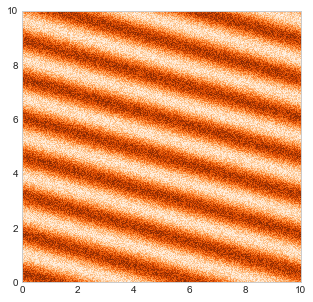

In [181]:
[x, y]= np.meshgrid(np.linspace(0,10,64), np.linspace(0,10,64))

f = np.sin(2*np.pi*(0.2*x + 0.7*y))+np.random.uniform(0, 1, x.shape)
plt.figure(figsize=(5,5))
plt.pcolor(x,y,f, cmap = 'Oranges')

/var/folders/7n/jy1_ycd91snbbhld0x37jht80000gn/T/ipykernel_24918/1820409669.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x,y,np.real(ft), cmap = 'Oranges')


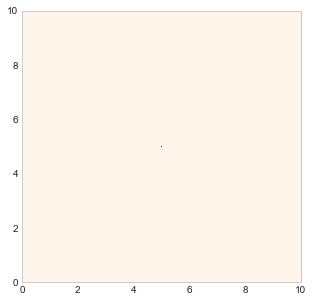

In [182]:
# Transformada de Fourier

[x, y]= np.meshgrid(np.linspace(0,10,64), np.linspace(0,10,64))

ft = fftshift(fft2(f))

plt.figure(figsize=(5,5))
plt.pcolor(x,y,np.real(ft), cmap = 'Oranges')